### Author: *May*

# BUSINESS UNDERSTANDING

## Context and Business Problem

Retirement income adequacy remains a significant and growing concern in Kenya as life expectancy increases and traditional family-based support systems continue to weaken. Pension schemes are intended to provide financial security after retirement, yet evidence from industry reports and empirical studies suggests that a large proportion of pension scheme members retire with insufficient income to maintain a reasonable standard of living.

Industry benchmarks recommend a **replacement ratio of 60–80%** of a member’s final salary to achieve adequate retirement income. However, studies show that **only about 13% of defined contribution (DC) schemes** and **approximately 6% of defined benefit (DB) schemes** in Kenya deliver replacement ratios considered adequate for members joining at age 25. This indicates that the majority of scheme members face a high risk of income inadequacy in retirement unless they make additional voluntary savings.

At the system level, Kenya’s pension sector has experienced substantial asset growth. Pension assets exceeded **KSh 2.25 trillion by December 2024** and rose further to **over KSh 2.53 trillion by mid-2025**, largely driven by reforms such as the implementation of the **NSSF Act, 2013**. Despite this growth, the pension sector’s **asset-to-GDP ratio remains relatively low at approximately 14–15%**, compared to more mature pension systems. This suggests that asset growth has not translated into uniformly adequate retirement outcomes at the individual member level.

A critical challenge lies in the unequal retirement outcomes observed across salary scales. Evidence from the literature and data indicates that lower-income earners often achieve **higher replacement ratios** due to compulsory contribution mechanisms, while higher-income earners—despite contributing larger absolute amounts—experience **lower proportional income replacement** as contribution rates decline relative to income. Historical contribution rates of **15% (2004–2014)** and the current **18% rate** have been shown to be **inadequate**, particularly under early retirement scenarios.

These disparities are typically not visible during active employment but become evident at retirement, when corrective actions are no longer possible. For pension trustees, employers, and regulators, this creates a pressing need for data-driven tools to identify at-risk members early and to support timely policy and scheme design interventions.

## Business Objectives

- **Assess retirement income adequacy:** Measure and compare replacement ratios across salary bands.
- **Analyze contribution behavior:** Examine how employee and employer contribution rates and contribution amounts vary with income.
- **Identify at-risk groups:** Detect salary levels and member profiles associated with low projected replacement ratios.
- **Understand key drivers:** Determine which factors most strongly influence retirement income outcomes.
- **Support evidence-based decision-making:** Inform contribution rate reviews, scheme design improvements, and member education initiatives.

## Stakeholders

- **Pension Scheme Trustees:** Evaluate whether schemes deliver adequate and equitable retirement outcomes.
- **Fund Managers and Administrators:** Identify contribution gaps and members at risk of inadequate retirement income.
- **Employers:** Assess the effectiveness of existing contribution arrangements and consider enhancements.
- **Regulators (Retirement Benefits Authority):** Monitor pension adequacy and assess the impact of regulatory reforms.
- **Policymakers:** Inform national pension policy and long-term retirement income sustainability strategies.
- **Scheme Members:** Benefit indirectly from improved scheme design and clearer communication on retirement readiness.

## Success Metrics

- **Replacement ratio outcomes:** Proportion of members achieving recommended adequacy benchmarks (60–80%).
- **Contribution adequacy:** Consistency and sufficiency of contribution rates across salary scales.
- **Model performance metrics:** Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared for replacement ratio predictions.
- **Feature importance:** Stability and interpretability of key drivers such as contribution rates and years of service.
- **Business relevance:** Ability to clearly identify salary groups most exposed to inadequate retirement income.

# DATA UNDERSTANDING

This study uses member-level pension data to analyze contribution behavior and retirement income adequacy across salary scales among pension scheme members in Kenya. The dataset represents anonymized administrative records drawn from multiple pension schemes and captures key demographic, employment, and contribution-related attributes relevant to retirement outcomes.

## Data Source

The dataset consists of **2,561 observations**, where each row represents an individual pension scheme member. The data includes information on members’ earnings, contribution rates, accumulated pension savings, and employment tenure. All personal identifiers have been removed to ensure confidentiality and ethical use of the data.

The data is suitable for analyzing pension adequacy because it captures the primary determinants of retirement outcomes under defined contribution (DC) pension arrangements.

## Key Variables

The dataset contains the following core variables:

- **Salary:** The member’s current or final basic salary, used as a proxy for pre-retirement earnings.
- **Age:** The current age of the member.
- **Retirement Age:** The assumed or expected retirement age for the member.
- **Years:** The total number of years to retirement.
- **Employee Contribution Rate (EE):** Percentage of salary contributed by the employee.
- **Employer Contribution Rate (ER):** Percentage of salary contributed by the employer.
- **DOB:** Date Of Birth. 
- **Total Contributions:** Cumulative contributions made over the member’s service period.
- **Fund Value:** What does Fund Value mean again?.

From these variables, additional analytical features are derived, including **projected retirement income** and **replacement ratios**, which form the core outcome measures of this study.

## Target Variable

The primary outcome of interest is the **replacement ratio**, defined as the proportion of a member’s pre-retirement salary that is expected to be replaced by pension income during retirement.

Since actual pension payouts are not observed in the data, replacement ratios are **projected** by converting accumulated fund values into estimated annual retirement income using standard annuitization assumptions. These assumptions are applied consistently across all members to enable fair comparison across salary groups.

However, the data does not capture investment performance history, annuity pricing variation, or post-retirement behavior. As a result, findings are interpreted as **projected retirement outcomes under standardized assumptions**, rather than realized pension income.

These limitations are explicitly acknowledged and addressed in the interpretation of results.

In [62]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Mathematical Operations
import math

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display

#### Now to load the data and print it out.

In [63]:
# Load data
data = pd.read_csv('../Data/Research data- Raw.csv')
data

,No.,DOB,Age,Fund Value,Salary,Contributions,EE,ER,Years,Retirement age
0,1,3/25/1975,51.0,"12,621,655.25","421,820.00","84,364.00",10%,10%,9.0,60.0
1,2,2/23/1981,45.0,"8,149,961.01","465,010.00","93,002.00",10%,10%,15.0,60.0
2,3,7/24/1991,35.0,"7,085,348.52","504,660.00","100,932.00",10%,10%,25.0,60.0
3,4,4/13/1986,40.0,"6,028,192.05","504,660.00","100,932.00",10%,10%,20.0,60.0
4,5,11/14/1980,46.0,"9,458,131.00","504,660.00","100,932.00",10%,10%,14.0,60.0
...,...,...,...,...,...,...,...,...,...,...
2556,2557,1/1/1980,46.0,"140,829.12","61,215.00","6,121.50",5%,5%,-46.0,NaN
2557,2558,1/1/1980,46.0,"169,616.84","69,120.40","6,912.04",5%,5%,-46.0,NaN
2558,2559,1/1/1980,46.0,"114,402.78","52,618.00","5,261.80",5%,5%,-46.0,NaN
2559,2560,1/1/1980,46.0,"475,380.00","378,000.00","37,800.00",5%,5%,-46.0,NaN


##### *Observation:*

The data is consistent from top to bottom.

The No. column offers very little analytical values and will thus be dropped. Additionally, since there exist an age column, the DOB column is redundant. This too will be dropped.

Next, I will carry out a quick Initial Data Exploration (IDE) to get a bird’s-eye view of the dataset - just as you would form first impressions when greeting someone new.

In [64]:
# Drop No. column and DOB column
data = data.drop(columns=['No.', 'DOB'])

In [65]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*40)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*40)
print("Metadata Check:\n")
display(data.info())

# Descriptive statistics
print('\n'+'--'*40)
print("Descriptive Statistics For Numeric Variables:")
display(data.describe().T)

# Categorical Variables
print('\n'+'--'*40)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

# Check number of unique values in each column
print('\n'+'--'*40)
print("Unique values:")
display(data.nunique())

# Check and remove duplicates
print('\n'+'--'*40)
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*40)
missing = (
    data
    .isnull()
    .sum()
    .to_frame("Missing Values")
    .assign(Percentage=lambda x: (x["Missing Values"] / len(data)) * 100)
    .sort_values("Missing Values", ascending=False)
)

print("Missing values summary:\n")
print(missing[missing["Missing Values"] > 0])

The dataset has 2561 rows and 8 columns.

--------------------------------------------------------------------------------
Columns:


Index(['Age', ' Fund Value ', ' Salary ', ' Contributions ', 'EE', ' ER ',
       ' Years ', 'Retirement age'],
      dtype='object')


--------------------------------------------------------------------------------
Metadata Check:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2561 non-null   float64
 1    Fund Value      2561 non-null   object 
 2    Salary          2560 non-null   object 
 3    Contributions   2560 non-null   object 
 4   EE               2561 non-null   object 
 5    ER              2561 non-null   object 
 6    Years           2561 non-null   float64
 7   Retirement age   1498 non-null   float64
dtypes: float64(3), object(5)
memory usage: 160.2+ KB


None


--------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
Age,2561.0,42.317454,6.540048,24.0,37.0,45.0,46.0,59.0
Years,2561.0,-7.221788,29.215819,-50.0,-45.0,10.0,18.0,34.0
Retirement age,1498.0,60.000000,0.000000,60.0,60.0,60.0,60.0,60.0



--------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
Fund Value,2561,2038,"777,079.24",86
Salary,2560,456,"32,054.60",172
Contributions,2560,456,"3,205.46",172
EE,2561,4,5%,1443
ER,2561,4,5%,1253



--------------------------------------------------------------------------------
Unique values:


Age                  35
 Fund Value        2038
 Salary             456
 Contributions      456
EE                    4
 ER                   4
 Years               59
Retirement age        1
dtype: int64


--------------------------------------------------------------------------------
Duplicates: 284

--------------------------------------------------------------------------------
Missing values summary:

                 Missing Values  Percentage
Retirement age             1063   41.507224
 Contributions                1    0.039047
 Salary                       1    0.039047


#### *Observation:*

- Dataset Size and Structure  
  - 2,561 rows and 10 columns.  
  - Columns include demographic, employment, and pension-related attributes.  

- Column Types and Data Quality  
  - Numeric columns: No. (int64), Age, Years, Retirement age (float64).  
  - Object columns: DOB, Fund Value, Salary, Contributions, EE, ER.  
  - Missing values:  
    - Salary and Contributions: 1 missing value each.  
    - Retirement age: 1,063 missing values.  
  - Issues:  
    - Columns like Fund Value, Salary, Contributions, EE, ER are stored as objects. They require type conversion.  
    - Years contains negative values (down to -50), which may indicate data entry errors or special encoding??  

- Descriptive Statistics:
  - Numeric Columns: 
    - Age: 24–59 years, mean 42.3.  
    - Years: mean -7.22, std 29.21, minimum -50, maximum 34 (data anomalies present).  
    - Retirement age: consistently 60 for all non-missing entries.  

  - Categorical Columns:  
    - DOB: 1,542 unique values (multiple members share birthdates).  
    - Fund Value: 2,038 unique values, most frequent 777,079.24.  
    - Salary & Contributions: 456 unique values each; most frequent 32,054.60 and 3,205.46 respectively.  
    - EE & ER: 4 unique values each; most frequent 5%.  

- Takeaways 
  - Dataset contains a mix of numeric and object-formatted financial data requiring **cleaning and type conversion**.  
  - Missing and negative values need attention before modeling or analysis.  
  - Uniformity in Retirement age indicates either a policy standard or limited variability.


# DATA WRANGLING

We start by standardizing the columns by lowercasing them and removing leading and trailing whitespaces then do type conversion. This is to ensure the data is consistent.

In [66]:
# Standardize column names
data.columns = (
    data.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_') 
      .str.replace(r'[^\w]', '', regex=True)
)

# Rename Years to years_to_retirement
data = data.rename(columns={'years': 'years_to_retirement'})

display(data.columns)

# ---------- [Type conversions] ----------

# Convert monetary columns
money_cols = ['fund_value', 'salary', 'contributions']

for col in money_cols:
    data[col] = (
        data[col]
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# Convert percentage columns
percent_cols = ['ee', 'er']

for col in percent_cols:
    data[col] = (
        data[col]
        .str.replace('%', '', regex=False)
        .astype(float)
        / 100
    )

# Ensure numeric columns
numeric_cols = ['age', 'years_to_retirement', 'retirement_age']
data[numeric_cols] = data[numeric_cols].astype(float)

# Sanity check
print('Dataset Preview:')
display(data.head())

print("Metadata Check After Cleaning:\n")
display(data.info())

Index(['age', 'fund_value', 'salary', 'contributions', 'ee', 'er',
       'years_to_retirement', 'retirement_age'],
      dtype='object')

Dataset Preview:


,age,fund_value,salary,contributions,ee,er,years_to_retirement,retirement_age
0,51.0,12621655.25,421820.0,84364.0,0.1,0.1,9.0,60.0
1,45.0,8149961.01,465010.0,93002.0,0.1,0.1,15.0,60.0
2,35.0,7085348.52,504660.0,100932.0,0.1,0.1,25.0,60.0
3,40.0,6028192.05,504660.0,100932.0,0.1,0.1,20.0,60.0
4,46.0,9458131.00,504660.0,100932.0,0.1,0.1,14.0,60.0


Metadata Check After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2561 non-null   float64
 1   fund_value           2561 non-null   float64
 2   salary               2560 non-null   float64
 3   contributions        2560 non-null   float64
 4   ee                   2561 non-null   float64
 5   er                   2561 non-null   float64
 6   years_to_retirement  2561 non-null   float64
 7   retirement_age       1498 non-null   float64
dtypes: float64(8)
memory usage: 160.2 KB


None

Next, we drop duplicated records to maintain dataset uniqueness and integrity.

In [67]:
# Dealing with duplicates.
# Exact duplicate observations were identified and removed to avoid over-representation.
data = data.drop_duplicates().reset_index(drop=True)

# Sanity check after removing duplicates
print("Duplicates after cleaning:", data.duplicated().sum())

Duplicates after cleaning: 0


And lastly, we drop nulls in salary and contributions columns and fill nulls in retirement_age with the median.

In [68]:
# Dealing with nulls
# Drop observations with missing salary or contributions
data = data.dropna(subset=["salary", "contributions"]).reset_index(drop=True)

# Fill missing values in retirement_age with median
median_retirement_age = data["retirement_age"].median()
data["retirement_age"] = data["retirement_age"].fillna(median_retirement_age)

# Sanity check after handling nulls
print("Missing values after cleaning:")
display(data[["salary", "contributions", "retirement_age"]].isnull().sum())

Missing values after cleaning:


salary            0
contributions     0
retirement_age    0
dtype: int64

With the data cleaned, we proceed to Exploratory Data Analysis (EDA) in three stages:

- Univariate analysis: explore individual variables.
- Bivariate analysis: examine relationships between pairs of variables.
- Multivariate analysis: analyze interactions among three or more variables.

# EXPLAROTORY DATA ANALYSIS (EDA)

## 1. UNIVARIATE ANALYSIS

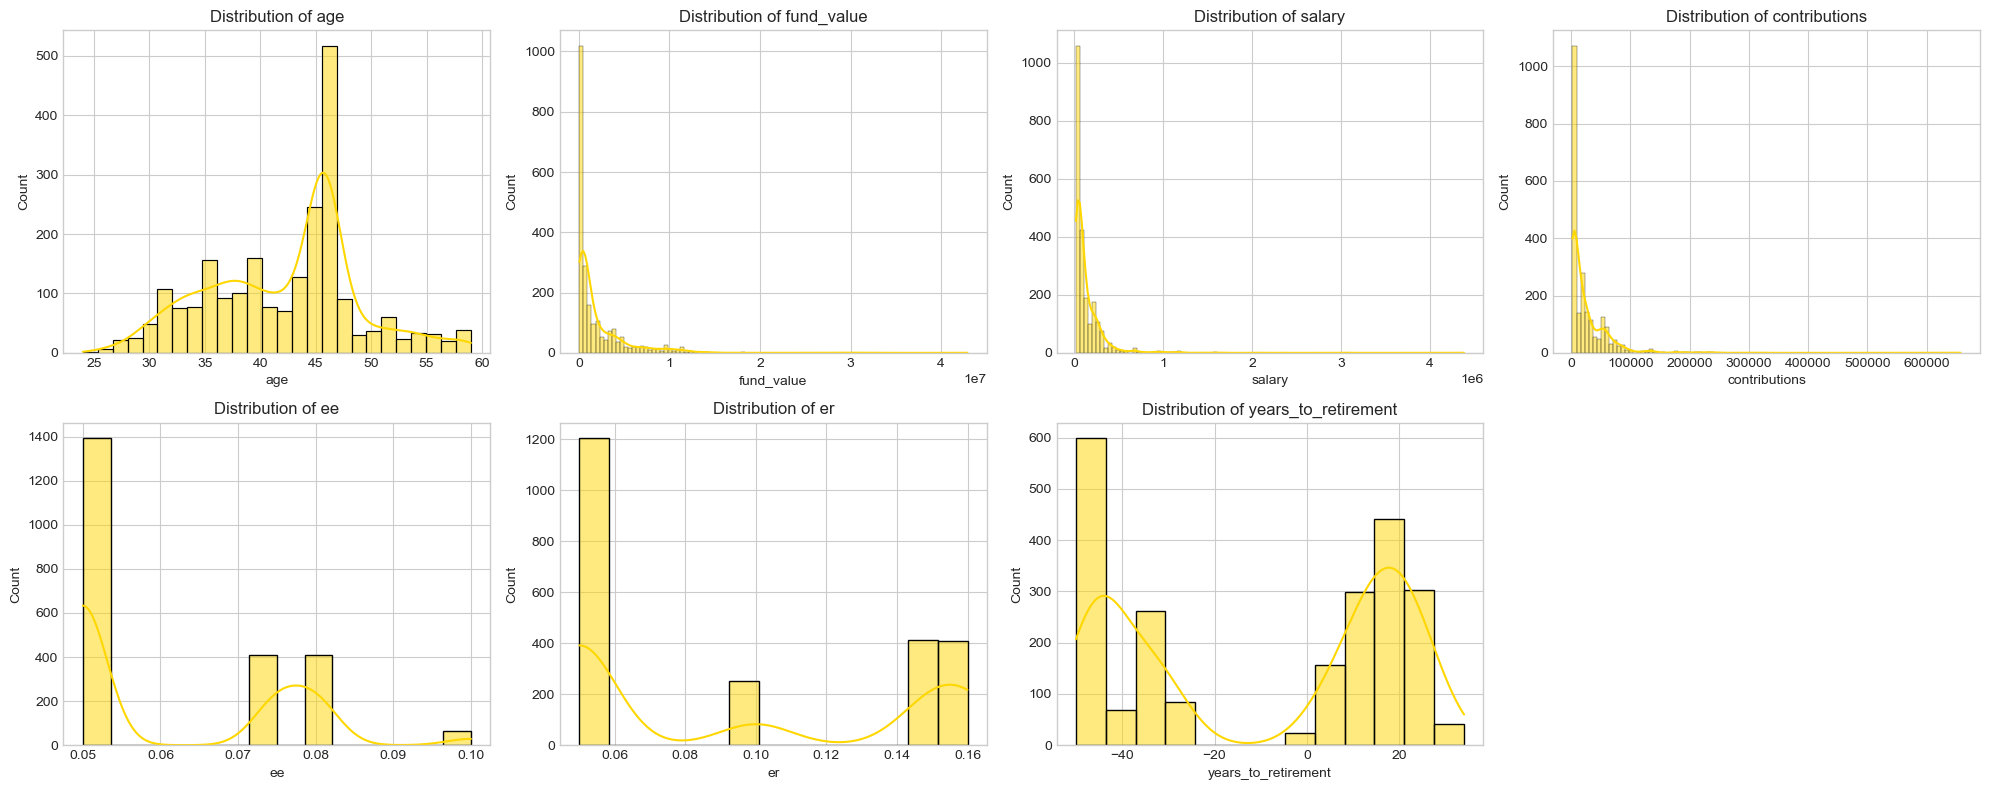

In [70]:
# Columns to plot (exclude 'retirement_age')
numeric_cols = [col for col in data.columns if col != "retirement_age"]

# Determine grid size
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='#FFD700')  
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observation:*

Age: Appears roughly normally distributed with a slight right tail with most members fall between 35–48 years. A smaller cluster near the late 40s may indicate many individuals approaching retirement planning.

Fund Value is highly right-skewed. Majority have relatively low balances, while a few extremely large values create a long tail. This signals wealth concentration — a small portion of members hold a large share of assets.

Salary is also strongly right-skewed, similar to fund value. Most salaries are clustered at lower ranges with several high-income outliers. Likely reflecting hierarchical pay structures.

Contributions: Mirrors salary distribution — not surprising since contributions are often salary-based. Presence of large outliers suggests high earners, members making additional voluntary contributions.

Employee Rate (ee) looks multi-modal, not continuous, suggesting contributions are tied to policy tiers (e.g., 5%, 7.5%, 10%) rather than freely chosen percentages.

Employer Rate (er) is even more clearly discrete. Likely determined by company policy or pension rules. Could be useful as a categorical feature rather than purely numeric in modeling.

Years to Retirement appears bimodal. One group with negative values → possibly already past retirement age but still active. Another cluster around 10–25 years → mid-career employees.

This split may have major implications for:

- Withdrawal risk
- Fund liquidity
- Investment strategy

## 2. BIVARIATE ANALYSIS